In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
%matplotlib inline
import scipy.special as sp

In [3]:
rad2deg = 180/np.pi

In [4]:
# Number of phi values and the angular increment
nphi = 90
da = 2*np.pi/nphi

# Calculate theta and phi values
theta = np.arange(da/2, np.pi, da)
phi = np.arange(da/2, 2*np.pi, da)

# Get the associated legendre polynomials
l = 2
P_lm = map(lambda m: sp.lpmv(m, l, np.cos(theta)), range(l + 1)) 

len(P_lm)

3

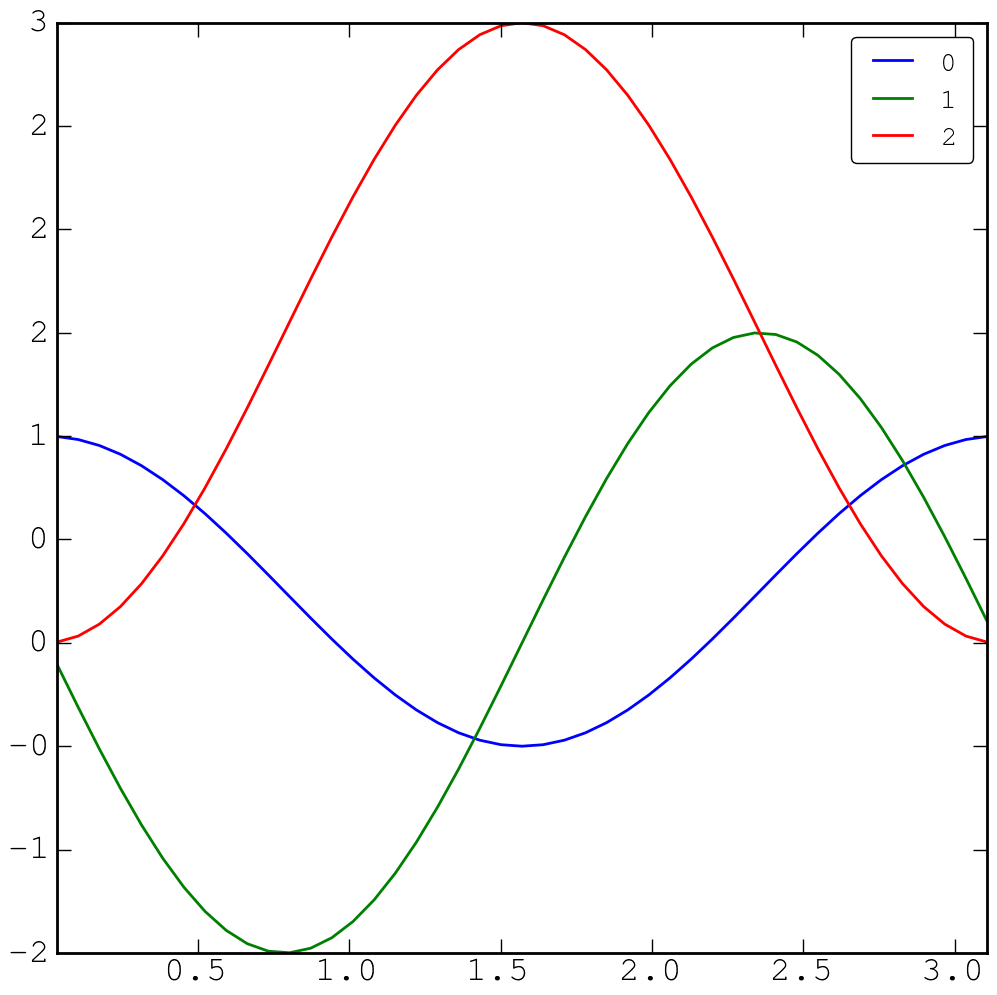

In [5]:
labels = ["0", "1", "2", "3", "4"]
ymajorFormatter = StrMethodFormatter('{x:3.0f}')
xmajorFormatter = StrMethodFormatter('{x:1.1f}')
fig,ax = plt.subplots(figsize=(12,12))
for i in xrange(l + 1):
    ax.plot(theta, P_lm[i], label=labels[i])
ax.xaxis.set_major_formatter(xmajorFormatter)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.axis('tight')
ax.legend(loc='best');

In [6]:
# select desired poly and multiply by complex exponential in phi
m = 0
Y_lm = np.sqrt(1.0/(2*np.pi)) * (P_lm[m]).reshape((-1,1)) * np.exp(1j * m * phi)
Y_lm.shape

(45, 90)

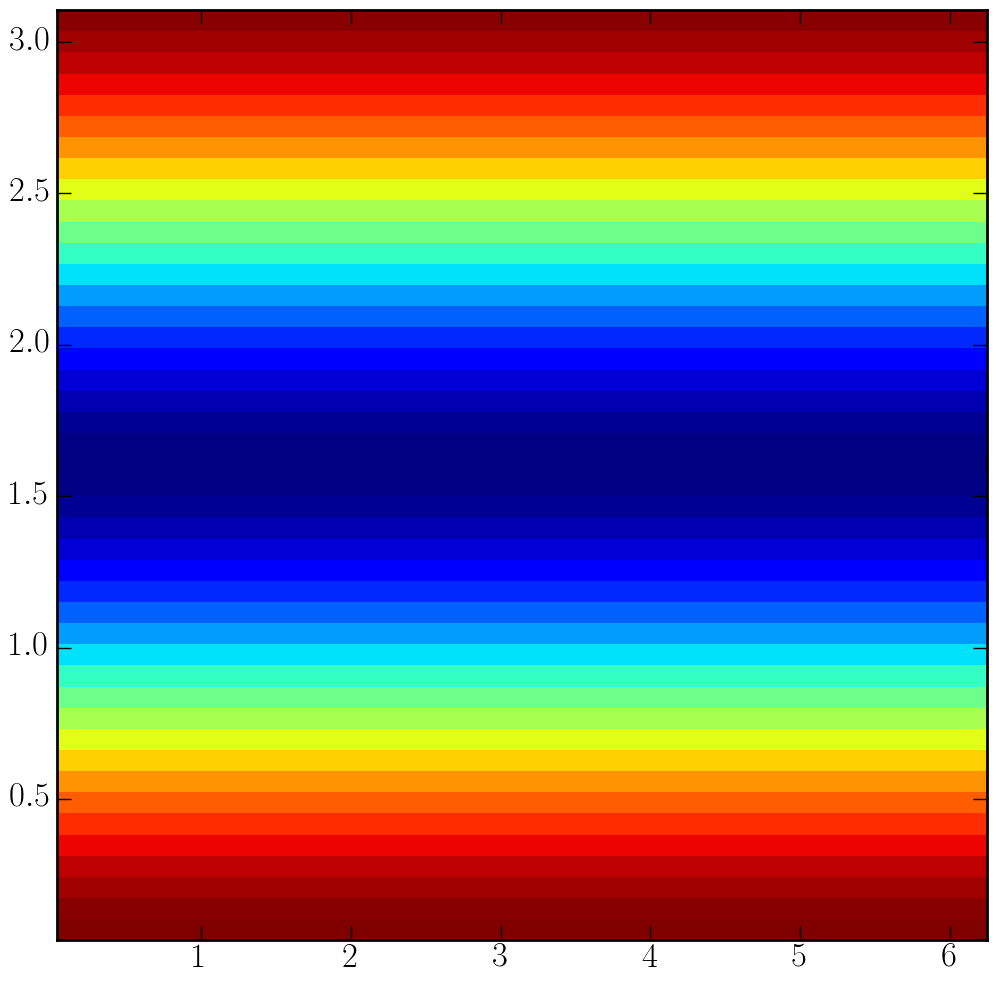

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
ax.pcolor(phi, theta, np.real(Y_lm));
ax.axis('tight');

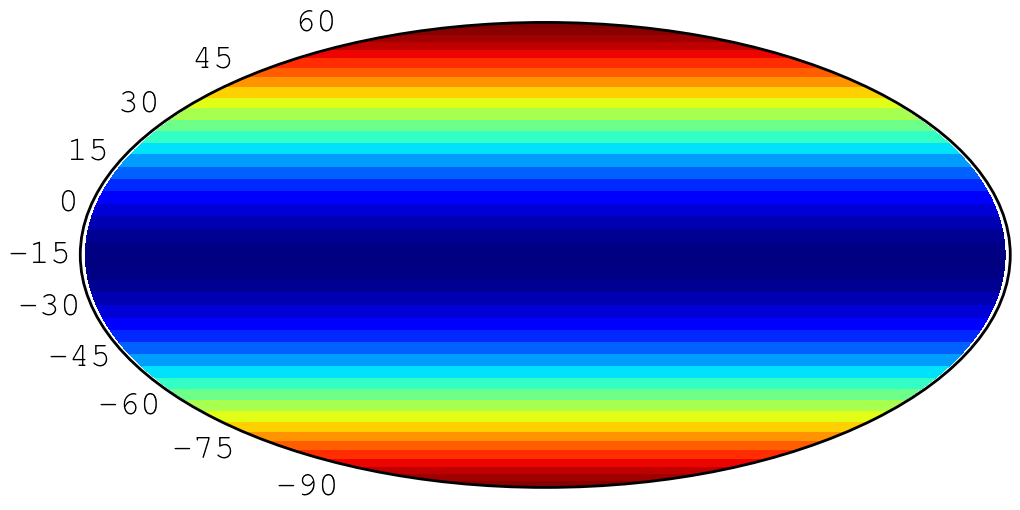

In [8]:
ylabels = map(str, range(-90, 90, 15))
yFormatter = StrMethodFormatter(r"{x:2.1f}")
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(projection='mollweide'))
ax.pcolor(phi - np.pi, np.pi/2 - theta, np.real(Y_lm));
ax.xaxis.set_visible(False)
ax.yaxis.set_ticklabels(ylabels);
# ax.yaxis.set_major_formatter(yFormatter);

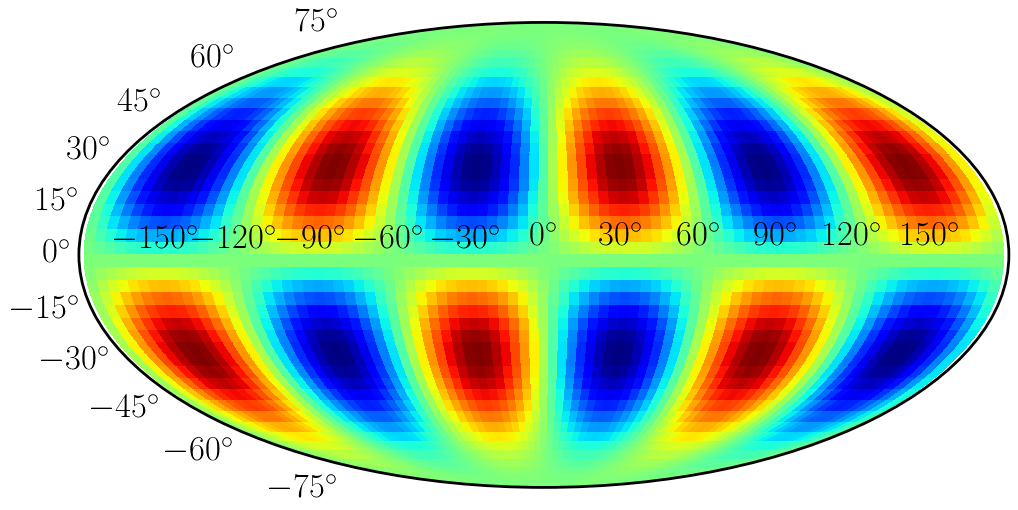

In [24]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(projection='mollweide'))
ax.pcolor(phi - np.pi, np.pi/2 - theta, np.imag(Y_lm));
ax.xaxis.set_visible(False)
ax.yaxis.set_ticklabels(ylabels);

In [12]:
sp.sph_harm(2,2,0,np.pi/2)

(0.38627420202318963+0j)